In [16]:
import pandas as pd
import torch

# Step 1: Load the data
d1 = pd.read_csv("student-mat.csv", sep=";")
d2 = pd.read_csv("student-por.csv", sep=";")

# Step 2: Merge the dataframes on specified columns
merge_columns = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu",
                  "Mjob", "Fjob", "reason", "nursery", "internet"]
d3 = pd.merge(d1, d2, on=merge_columns)

# Define the columns for grades in mathematics (G1_x, G2_x, G3_x) and Portuguese (G1_y, G2_y, G3_y)
math_columns = ['G1_x', 'G2_x', 'G3_x']
portuguese_columns = ['G1_y', 'G2_y', 'G3_y']

# Step 3: Extract the relevant columns from the dataframe
grades_df = d3[math_columns + portuguese_columns]

# Step 4: Convert categorical columns to numeric (if any exist in your data)
# In this case, all selected columns should already be numeric, but if not, use pd.get_dummies or LabelEncoder on categorical columns.
grades_df = grades_df.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric to NaN
grades_df = grades_df.dropna()  # Drop rows with NaN values (optional if any exist)

# Step 5: Convert the Pandas DataFrame to a NumPy array
data_numpy = grades_df.to_numpy()

# Step 6: Convert the NumPy array to a PyTorch tensor
data_tensor = torch.tensor(data_numpy, dtype=torch.float32)

# Verify the result
print(data_tensor.shape)  # Check the shape of the tensor
print(data_tensor[:5])  # Print first 5 rows of the tensor


torch.Size([382, 6])
tensor([[ 5.,  6.,  6.,  0., 11., 11.],
        [ 5.,  5.,  6.,  9., 11., 11.],
        [ 7.,  8., 10., 12., 13., 12.],
        [15., 14., 15., 14., 14., 14.],
        [ 6., 10., 10., 11., 13., 13.]])


In [17]:
import pandas as pd
import torch

# Define the columns for grades in mathematics (G1_x, G2_x, G3_x) and Portuguese (G1_y, G2_y, G3_y)
math_columns = ['G1_x', 'G2_x', 'G3_x']
portuguese_columns = ['G1_y', 'G2_y', 'G3_y']

# Extract the relevant columns from the dataframe
grades_df = d3[math_columns + portuguese_columns]

# Step 1: Convert the Pandas DataFrame to a PyTorch tensor
grades_tensor = torch.tensor(grades_df.to_numpy(), dtype=torch.float32)

# Step 2: Compute the ranks of the tensor (for Spearman correlation)
# Rank is done column-wise (dim=0) and rank starts from 1, so we use torch.argsort twice
def rank_tensor(tensor):
    ranks = torch.argsort(torch.argsort(tensor, dim=0), dim=0).float() + 1
    return ranks

ranked_tensor = rank_tensor(grades_tensor)

# Step 3: Compute the Pearson correlation on the ranked data (this gives Spearman correlation)
def compute_correlation_matrix(tensor):
    # Normalize the tensor (zero-mean)
    mean = torch.mean(tensor, dim=0, keepdim=True)
    tensor_centered = tensor - mean

    # Compute covariance matrix
    covariance_matrix = torch.matmul(tensor_centered.T, tensor_centered) / (tensor.shape[0] - 1)

    # Compute standard deviations
    stddev = torch.sqrt(torch.diag(covariance_matrix))

    # Compute correlation matrix
    correlation_matrix = covariance_matrix / torch.outer(stddev, stddev)

    return correlation_matrix

# Step 4: Calculate the Spearman correlation matrix
spearman_correlation_matrix = compute_correlation_matrix(ranked_tensor)

# Print the Spearman correlation matrix
print("Spearman correlation matrix between grades in mathematics and Portuguese (PyTorch):")
print(spearman_correlation_matrix)


Spearman correlation matrix between grades in mathematics and Portuguese (PyTorch):
tensor([[1.0000, 0.8945, 0.8713, 0.5394, 0.5622, 0.5736],
        [0.8945, 1.0000, 0.9468, 0.5370, 0.5771, 0.5588],
        [0.8713, 0.9468, 1.0000, 0.5272, 0.5660, 0.5448],
        [0.5394, 0.5370, 0.5272, 1.0000, 0.8882, 0.8528],
        [0.5622, 0.5771, 0.5660, 0.8882, 1.0000, 0.9322],
        [0.5736, 0.5588, 0.5448, 0.8528, 0.9322, 1.0000]])


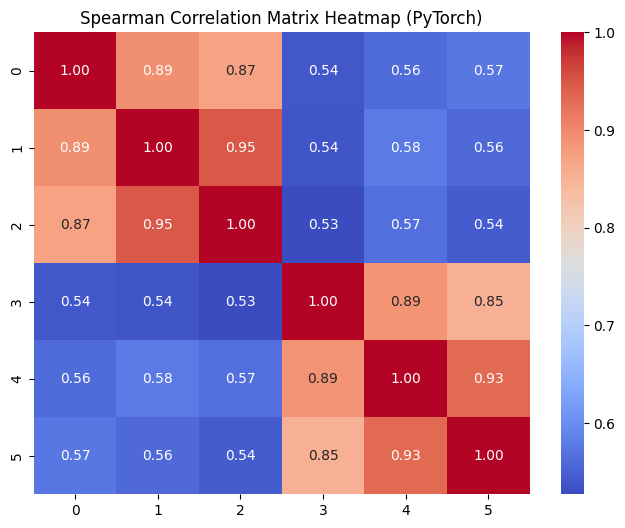

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch

# Assuming `spearman_correlation_matrix` is your correlation matrix in PyTorch (as computed earlier)

# Step 1: Convert the PyTorch tensor to a NumPy array for Seaborn
correlation_matrix_numpy = spearman_correlation_matrix.detach().numpy()

# Step 2: Plot the correlation matrix using Seaborn and Matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_numpy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix Heatmap (PyTorch)')
plt.show()


In [19]:
import pandas as pd
import torch

# Define the columns for grades in mathematics (G1_x, G2_x, G3_x) and Portuguese (G1_y, G2_y, G3_y)
math_columns = ['G1_x', 'G2_x', 'G3_x']
portuguese_columns = ['G1_y', 'G2_y', 'G3_y']

# Extract the relevant columns from the dataframe
grades_df = d3[math_columns + portuguese_columns]

# Step 1: Convert the Pandas DataFrame to a PyTorch tensor
grades_tensor = torch.tensor(grades_df.to_numpy(), dtype=torch.float32)

# Step 2: Compute the Pearson correlation matrix
def compute_correlation_matrix(tensor):
    # Normalize the tensor (zero-mean)
    mean = torch.mean(tensor, dim=0, keepdim=True)
    tensor_centered = tensor - mean

    # Compute covariance matrix
    covariance_matrix = torch.matmul(tensor_centered.T, tensor_centered) / (tensor.shape[0] - 1)

    # Compute standard deviations
    stddev = torch.sqrt(torch.diag(covariance_matrix))

    # Compute Pearson correlation matrix
    correlation_matrix = covariance_matrix / torch.outer(stddev, stddev)

    return correlation_matrix

# Step 3: Calculate the Pearson correlation matrix
pearson_correlation_matrix = compute_correlation_matrix(grades_tensor)

# Print the Pearson correlation matrix
print("Pearson correlation matrix between grades in mathematics and Portuguese (PyTorch):")
print(pearson_correlation_matrix)


Pearson correlation matrix between grades in mathematics and Portuguese (PyTorch):
tensor([[1.0000, 0.8604, 0.8051, 0.5680, 0.5888, 0.5508],
        [0.8604, 1.0000, 0.9030, 0.5259, 0.5697, 0.5075],
        [0.8051, 0.9030, 1.0000, 0.4953, 0.5356, 0.4803],
        [0.5680, 0.5259, 0.4953, 1.0000, 0.8879, 0.8190],
        [0.5888, 0.5697, 0.5356, 0.8879, 1.0000, 0.8924],
        [0.5508, 0.5075, 0.4803, 0.8190, 0.8924, 1.0000]])


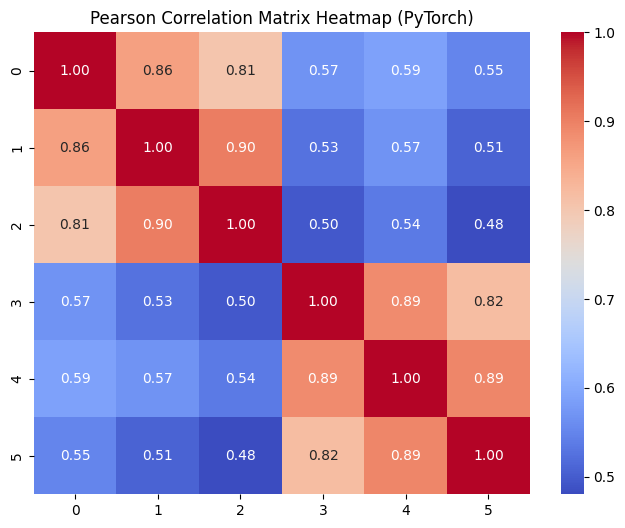

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch

# Assuming pearson_correlation_matrix is the PyTorch correlation matrix computed earlier

# Step 1: Convert the PyTorch tensor to a NumPy array for Seaborn
correlation_matrix_numpy = pearson_correlation_matrix.detach().numpy()

# Step 2: Plot the correlation matrix using Seaborn and Matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_numpy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix Heatmap (PyTorch)')
plt.show()
